# EXPLORATORY DATA ANALYSIS ON AIR QUALITY

### Understanding Air Pollution 

Air pollution consists of harmful or poisonous substances in outdoor or indoor air. It is harmful to people even if they do not have lung disease, but it is particularly dangerous for people living with asthma, COPD, and other respiratory ailments.

Despite progress in recent years, air pollution continues to be a serious environmental and health problem. The Chicago metropolitan region continues to violate federal air quality standards for harmful ozone and still faces threats from particulate matter pollution. The U.S. Environmental Protection Agency also ranks poor indoor air quality among the top five environmental risks to public health.

### What is the air quality forecast for Kenya?

In early 2021, the capital city of Nairobi was classed as the dirtiest city in Kenya with a US AQI reading of 73. With a figure such as this, the air quality can be classed as “Moderate” according to recommendations by the World Health Organisation (WHO). The city which recorded the second worse level was Ngong in the Kajiado region.

The cleanest city was Lodwar in the Turkana region with a “Good” air quality figure of 46.

### Where does the information come from that records Kenya’s polluted air?

Gases such as sulphur dioxide, nitrogen dioxide and carbon monoxide are a result of burning fossil fuels. If inhaled by humans, these gases can significantly affect the amount of oxygen entering the bloodstream, which can have devastating effects.

Methane is a gas produced by the burning of oil and the decomposition of organic materials at waste filling sites. It can also come from the digestion of cattle and other livestock.

Additionally, the satellite can monitor aerosol particles that are formed by oil combustion, forest fires, desert dust, or volcanic eruptions. This new data on air pollution access has the potential to improve air pollution coverage and enable governments, especially in developing countries, and other stakeholders to make the impact of poor air quality on human health and the environment a priority better to solve the problem.

Currently, the USA and the UK are assisting Kenya in its fight with air pollution but through the use of relatively low-tech devices. Using data available from such satellites all governments will have access to data which will allow then to devise new policies aimed at making cleaner air available to its citizens.


### Impact of our Solution
we hope to create a system that provides realtime information of air quality data across Kenya and Africa at large, the soltion focuses on clean air initiatives to empower women, protect their health, and create opportunities for sustainable livelihoods, while also helping mitigate climate change impacts.

In [740]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import autoreload
import sys
import os
import csv
import prophet

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import precision_score, f1_score, accuracy_score, classification_report, recall_score, mean_absolute_error, mean_squared_error, root_mean_squared_error, confusion_matrix, ConfusionMatrixDisplay

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 1000)

sb.set_style('darkgrid')

In [519]:
df = pd.read_csv(r"D:\Open Classroom\Datasets\Air Quality and Health Impact\air_quality_health_impact_data.csv")
df.head()

,RecordID,AQI,PM10,PM2_5,NO2,SO2,O3,Temperature,Humidity,WindSpeed,RespiratoryCases,CardiovascularCases,HospitalAdmissions,HealthImpactScore,HealthImpactClass
0,1,187.270059,295.853039,13.038560,6.639263,66.161150,54.624280,5.150335,84.424344,6.137755,7,5,1,97.244041,0.0
1,2,475.357153,246.254703,9.984497,16.318326,90.499523,169.621728,1.543378,46.851415,4.521422,10,2,0,100.000000,0.0
2,3,365.996971,84.443191,23.111340,96.317811,17.875850,9.006794,1.169483,17.806977,11.157384,13,3,0,100.000000,0.0
3,4,299.329242,21.020609,14.273403,81.234403,48.323616,93.161033,21.925276,99.473373,15.302500,8,8,1,100.000000,0.0
4,5,78.009320,16.987667,152.111623,121.235461,90.866167,241.795138,9.217517,24.906837,14.534733,9,0,1,95.182643,0.0


### Dataset Overview
 1. Air Quality Indicators: AQI, PM10, PM2_5, NO2, SO2, O3 (measure of pollutants in the air).
 
             - AQI (Air Quality Index): A composite index representing overall air quality.
             - PM10 (Particulate Matter ≤ 10 microns): Larger particulate matter that can be inhaled into the lungs.
             - PM2.5 (Particulate Matter ≤ 2.5 microns): Finer particulate matter that can penetrate deep into the lungs and bloodstream.
             - NO2 (Nitrogen Dioxide): A harmful gas primarily from fossil fuel combustion.
             - SO2 (Sulfur Dioxide): A toxic gas produced by burning fossil fuels and volcanic activity.
             - O3 (Ozone): A pollutant formed at ground level, harmful to respiratory health.
             
 2. Environmental Factors: Temperat, Humidity, WindSpee (weather conditions that influence air quality).
 3. Health-Related Data: Respiratio, Cardiovas, HospitalA (medical conditions and admissions).
 4. Health Impact Measures: HealthImp, HealthImpactClass (quantified measures of health impact).

In [520]:
df.shape

(5811, 15)

In [521]:
df.isnull().sum()

RecordID               0
AQI                    0
PM10                   0
PM2_5                  0
NO2                    0
SO2                    0
O3                     0
Temperature            0
Humidity               0
WindSpeed              0
RespiratoryCases       0
CardiovascularCases    0
HospitalAdmissions     0
HealthImpactScore      0
HealthImpactClass      0
dtype: int64

In [522]:
df.describe().round()

,RecordID,AQI,PM10,PM2_5,NO2,SO2,O3,Temperature,Humidity,WindSpeed,RespiratoryCases,CardiovascularCases,HospitalAdmissions,HealthImpactScore,HealthImpactClass
count,5811.0,5811.0,5811.0,5811.0,5811.0,5811.0,5811.0,5811.0,5811.0,5811.0,5811.0,5811.0,5811.0,5811.0,5811.0
mean,2906.0,248.0,149.0,100.0,102.0,49.0,149.0,15.0,55.0,10.0,10.0,5.0,2.0,94.0,0.0
std,1678.0,145.0,86.0,58.0,58.0,29.0,87.0,14.0,26.0,6.0,3.0,2.0,1.0,13.0,1.0
min,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-10.0,10.0,0.0,1.0,0.0,0.0,22.0,0.0
25%,1454.0,123.0,75.0,49.0,54.0,25.0,74.0,2.0,32.0,5.0,8.0,3.0,1.0,98.0,0.0
50%,2906.0,249.0,148.0,101.0,103.0,50.0,150.0,15.0,55.0,10.0,10.0,5.0,2.0,100.0,0.0
75%,4358.0,374.0,222.0,151.0,152.0,73.0,223.0,27.0,78.0,15.0,12.0,6.0,3.0,100.0,0.0
max,5811.0,500.0,300.0,200.0,200.0,100.0,300.0,40.0,100.0,20.0,23.0,14.0,12.0,100.0,4.0


In [523]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5811 entries, 0 to 5810
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   RecordID             5811 non-null   int64  
 1   AQI                  5811 non-null   float64
 2   PM10                 5811 non-null   float64
 3   PM2_5                5811 non-null   float64
 4   NO2                  5811 non-null   float64
 5   SO2                  5811 non-null   float64
 6   O3                   5811 non-null   float64
 7   Temperature          5811 non-null   float64
 8   Humidity             5811 non-null   float64
 9   WindSpeed            5811 non-null   float64
 10  RespiratoryCases     5811 non-null   int64  
 11  CardiovascularCases  5811 non-null   int64  
 12  HospitalAdmissions   5811 non-null   int64  
 13  HealthImpactScore    5811 non-null   float64
 14  HealthImpactClass    5811 non-null   float64
dtypes: float64(11), int64(4)
memory usage:

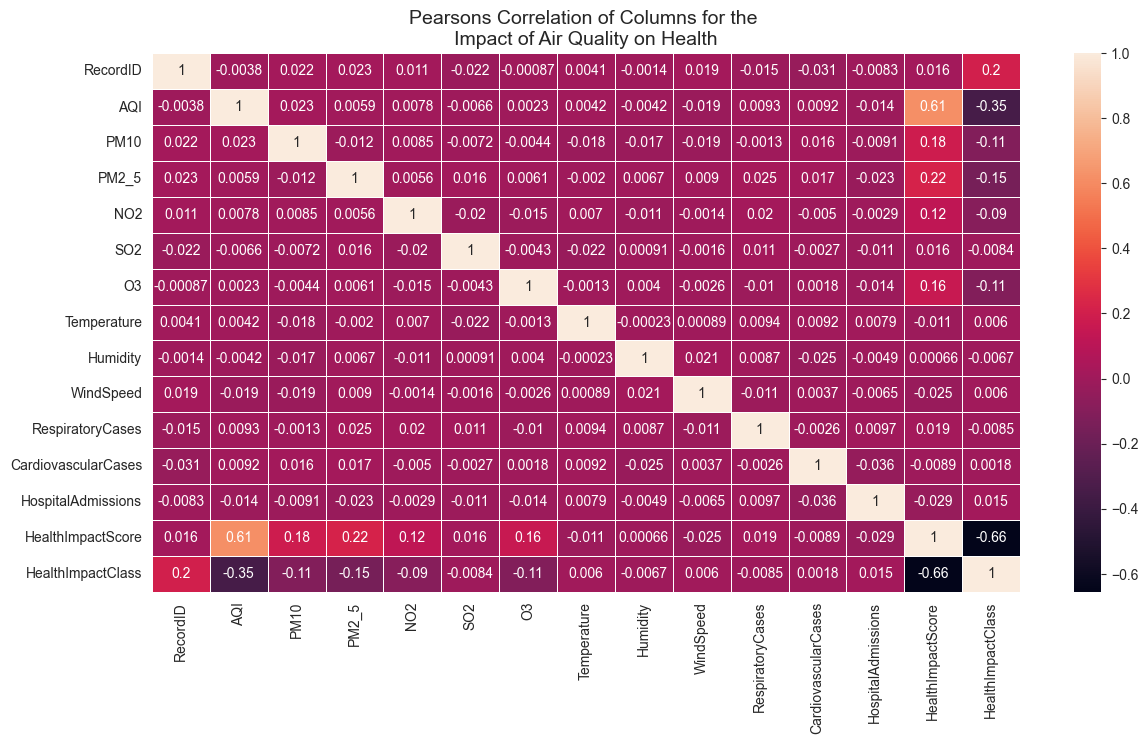

In [524]:
plt.figure(figsize=(14, 7))
sb.heatmap(df.corr(), annot=True, linewidth=0.5)
plt.title('Pearsons Correlation of Columns for the \nImpact of Air Quality on Health', fontsize=14)
plt.savefig('Pearsons Correlation for air quality')

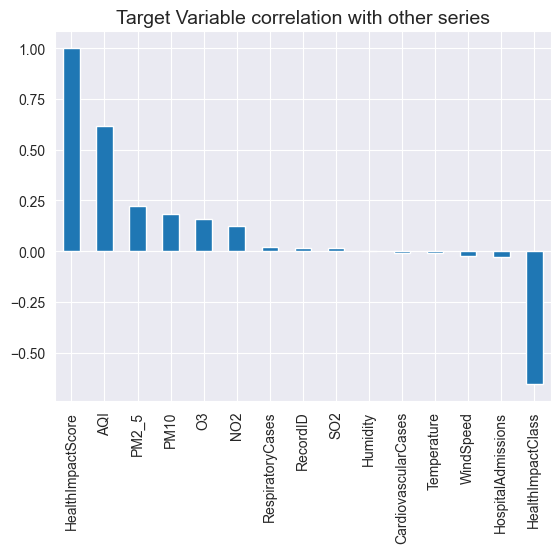

In [742]:
df.select_dtypes(include=['number']).corr()['HealthImpactScore'].sort_values(ascending=False).plot(kind='bar')
plt.title('Target Variable correlation with other series', fontsize=14)
plt.savefig('Health Impact Score Correlation')

We note that AQI, PM2_5, PM10, O3, NO2 highly impact the health related issues such as respiratory diseases and Chronic obstructive pulmonary disease (COPD) among others

In [526]:
df.head()

,RecordID,AQI,PM10,PM2_5,NO2,SO2,O3,Temperature,Humidity,WindSpeed,RespiratoryCases,CardiovascularCases,HospitalAdmissions,HealthImpactScore,HealthImpactClass
0,1,187.270059,295.853039,13.038560,6.639263,66.161150,54.624280,5.150335,84.424344,6.137755,7,5,1,97.244041,0.0
1,2,475.357153,246.254703,9.984497,16.318326,90.499523,169.621728,1.543378,46.851415,4.521422,10,2,0,100.000000,0.0
2,3,365.996971,84.443191,23.111340,96.317811,17.875850,9.006794,1.169483,17.806977,11.157384,13,3,0,100.000000,0.0
3,4,299.329242,21.020609,14.273403,81.234403,48.323616,93.161033,21.925276,99.473373,15.302500,8,8,1,100.000000,0.0
4,5,78.009320,16.987667,152.111623,121.235461,90.866167,241.795138,9.217517,24.906837,14.534733,9,0,1,95.182643,0.0


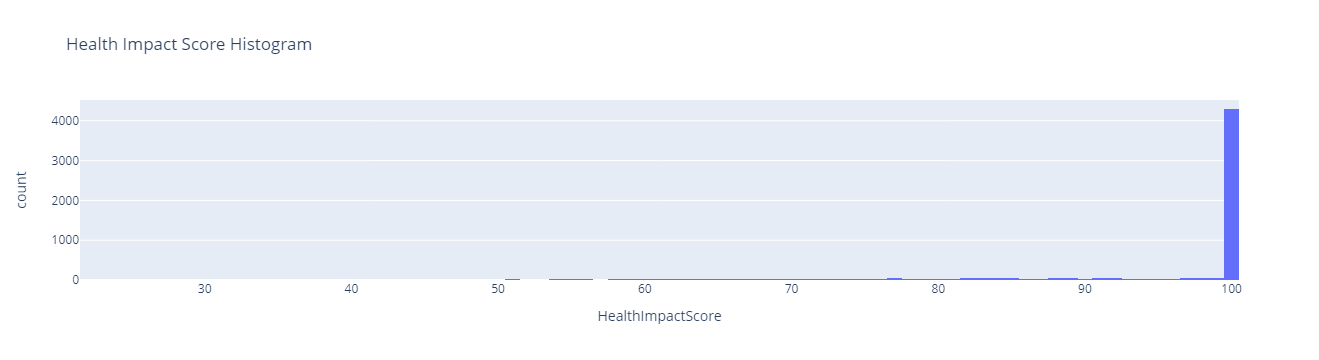

<Figure size 640x480 with 0 Axes>

In [527]:
fig = px.histogram(df, x = 'HealthImpactScore', title='Health Impact Score Histogram')
fig.show()
plt.savefig('Health Impact Score Histogram')

In [528]:
# px.bar(df, x=df[['AQI', 'PM10', 'PM2_5' , 'NO2' ,'SO2' ,'O3', 'Temperature', 'Humidity' ,'WindSpeed', 'RespiratoryCases', 'CardiovascularCases', 'HospitalAdmissions', 'HealthImpactScore']].mean())

In [529]:
for i in df.columns:
    print(f'Mean value of {i}:\t{df[i].mean().round(2)}')

Mean value of RecordID:	2906.0
Mean value of AQI:	248.44
Mean value of PM10:	148.65
Mean value of PM2_5:	100.22
Mean value of NO2:	102.29
Mean value of SO2:	49.46
Mean value of O3:	149.31
Mean value of Temperature:	14.98
Mean value of Humidity:	54.78
Mean value of WindSpeed:	9.99
Mean value of RespiratoryCases:	9.97
Mean value of CardiovascularCases:	4.99
Mean value of HospitalAdmissions:	2.0
Mean value of HealthImpactScore:	93.79
Mean value of HealthImpactClass:	0.28


In [726]:
df.head(20)

,RecordID,AQI,PM10,PM2_5,NO2,SO2,O3,Temperature,Humidity,WindSpeed,RespiratoryCases,CardiovascularCases,HospitalAdmissions,HealthImpactScore,HealthImpactClass
0,1,187.270059,295.853039,13.038560,6.639263,66.161150,54.624280,5.150335,84.424344,6.137755,7,5,1,97.244041,0.0
1,2,475.357153,246.254703,9.984497,16.318326,90.499523,169.621728,1.543378,46.851415,4.521422,10,2,0,100.000000,0.0
2,3,365.996971,84.443191,23.111340,96.317811,17.875850,9.006794,1.169483,17.806977,11.157384,13,3,0,100.000000,0.0
3,4,299.329242,21.020609,14.273403,81.234403,48.323616,93.161033,21.925276,99.473373,15.302500,8,8,1,100.000000,0.0
4,5,78.009320,16.987667,152.111623,121.235461,90.866167,241.795138,9.217517,24.906837,14.534733,9,0,1,95.182643,0.0
5,6,77.997260,36.113445,97.113240,87.769562,32.261206,136.999714,-1.441781,32.635904,4.675127,13,5,2,70.361491,1.0
6,7,29.041806,174.230575,68.578418,186.815370,96.766420,44.982397,34.378592,24.679305,6.610047,10,2,2,65.819949,1.0
7,8,433.088073,278.629026,83.673782,106.947943,9.707749,131.566014,33.707434,40.373157,17.376644,11,8,1,100.000000,0.0
8,9,300.557506,149.023028,185.789347,138.745212,90.267117,59.409878,33.123146,36.035212,14.464875,8,6,4,100.000000,0.0
9,10,354.036289,252.883645,182.150363,179.297055,44.521212,117.957437,9.537247,64.099202,14.253878,13,5,1,100.000000,0.0


### Health Impact Classification

In [736]:
x = df.drop(columns = ['HealthImpactClass'])
y = df['HealthImpactClass']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print('x train: ', x_train.shape)
print('x train: ', x_train.shape)
print('y test: ', y_train.shape)
print('y test: ', y_test.shape)

x train:  (4648, 14)
x train:  (4648, 14)
y test:  (4648,)
y test:  (1163,)


In [737]:
def model_analysis(model):
    # for i in model:
    
    model.fit(x_train, y_train)
    
    pred = model.predict(x_test)
    
    mean_ab_er = mean_absolute_error(pred, y_test)
    mean_sq_er = mean_squared_error(pred, y_test)

    
    print('')
    print(f'{model} Model Matrix')
    print('==================================')
    print(f'Mean absolute error: {mean_ab_er}')
    print(f'Mean squared error Score: {mean_sq_er}')
    print(f'Root Mean Squared: {mean_squared_error(y_test, pred)**0.5}')
    

In [738]:

lr = LinearRegression(),
dtc = DecisionTreeClassifier()

models = {
    'lr': LinearRegression(),
    'dtc': DecisionTreeRegressor(),
    'gbr': GradientBoostingRegressor(),
    'rfr': RandomForestRegressor(n_estimators=50),
}

In [739]:
for i in models.values():
    model_analysis(i)
    


LinearRegression() Model Matrix
Mean absolute error: 0.2661603091169101
Mean squared error Score: 0.28782062950694126
Mean Squared: 0.5364891699810364

DecisionTreeRegressor() Model Matrix
Mean absolute error: 0.07222699914015478
Mean squared error Score: 0.18056749785038692
Mean Squared: 0.4249323450272842

GradientBoostingRegressor() Model Matrix
Mean absolute error: 0.07712038351054581
Mean squared error Score: 0.12642410322217096
Mean Squared: 0.35556167288133145

RandomForestRegressor(n_estimators=50) Model Matrix
Mean absolute error: 0.06405846947549441
Mean squared error Score: 0.10913190025795358
Mean Squared: 0.330351177170528


Since Gradient Boosting Regressor outperformed all the models, therefore we will have to apply it in our system seems it is a more balanced performer across all metrics.

In [535]:
x_1 = df.drop(columns=['RecordID', 'Temperature', 'Humidity', 'WindSpeed', 'RespiratoryCases', 'CardiovascularCases', 'HospitalAdmissions', 'HealthImpactScore', 'HealthImpactClass'])
y_1 = df['HealthImpactClass']

x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(x_1, y_1, test_size=0.2, random_state=42, stratify=y)


def model_analysis(model):
    # for i in model:
    
    model.fit(x_train_1, y_train_1)
    
    pred_1 = model.predict(x_test_1)
    
    mean_ab_er = mean_absolute_error(pred_1, y_test_1)
    mean_sq_er = mean_squared_error(pred_1, y_test_1)

    
    print('')
    print(f'{model} Model Matrix')
    print('==================================')
    print(f'Mean absolute error: {mean_ab_er}')
    print(f'Mean squared error Score: {mean_sq_er}')
    print(f'Root Mean Squared: {mean_squared_error(y_test, pred_1)**0.5}')
    

In [536]:
for i in models.values():
    model_analysis(i)


LinearRegression() Model Matrix
Mean absolute error: 0.4014669896376882
Mean squared error Score: 0.42293205524985905
Mean Squared: 0.6503322652689616

DecisionTreeRegressor() Model Matrix
Mean absolute error: 0.2519346517626827
Mean squared error Score: 0.5958727429062769
Mean Squared: 0.7719279389336008

GradientBoostingRegressor() Model Matrix
Mean absolute error: 0.24487580533065512
Mean squared error Score: 0.2915272554802321
Mean Squared: 0.53993263976188

RandomForestRegressor(n_estimators=50) Model Matrix
Mean absolute error: 0.24447119518486676
Mean squared error Score: 0.29861324161650904
Mean Squared: 0.5464551597491866


In [537]:
gbr = GradientBoostingRegressor()

gbr.fit(x_train_1, y_train_1)
y_pred_1 = gbr.predict(x_test_1).round(0)


gbr.fit(x_train, y_train)
y_pred = gbr.predict(x_test).round(0)


In [538]:
pred_df = pd.DataFrame(y_pred_1, columns=['Dropped_Predictions'])
pred_df['Initial_Predictions'] = y_pred
pred_df.head()


,Dropped_Predictions,Initial_Predictions
0,1.0,0.0
1,0.0,0.0
2,0.0,0.0
3,2.0,2.0
4,0.0,0.0


In [539]:
pred_df['Initial_Predictions'].value_counts()

Initial_Predictions
 0.0    949
 1.0    114
 2.0     86
 3.0     13
-1.0      1
Name: count, dtype: int64

In [540]:
pred_df['Dropped_Predictions'].value_counts()

Dropped_Predictions
0.0    964
1.0    159
2.0     36
3.0      4
Name: count, dtype: int64

In [541]:
pred_df['Predictions_clip'] = pred_df['Dropped_Predictions'].clip(0, 1)
pred_df.head()

,Dropped_Predictions,Initial_Predictions,Predictions_clip
0,1.0,0.0,1.0
1,0.0,0.0,0.0
2,0.0,0.0,0.0
3,2.0,2.0,1.0
4,0.0,0.0,0.0


In [542]:
def manual_experiment(model, data):
    input_data = data
    
    input_data_to_array = np.asarray(input_data)
    
    reshape_input_data = input_data_to_array.reshape(1, -1)
    
    model.fit(x_train_1, y_train_1)
    
    pred = model.predict(reshape_input_data)
    
    print(pred)

In [543]:
data_input = [106.169555, 52.189112, 76.221865, 27.927680, 2.225013, 168.759089]
manual_experiment(gbr, data_input)

[0.57763635]


C:\Users\antonie\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names



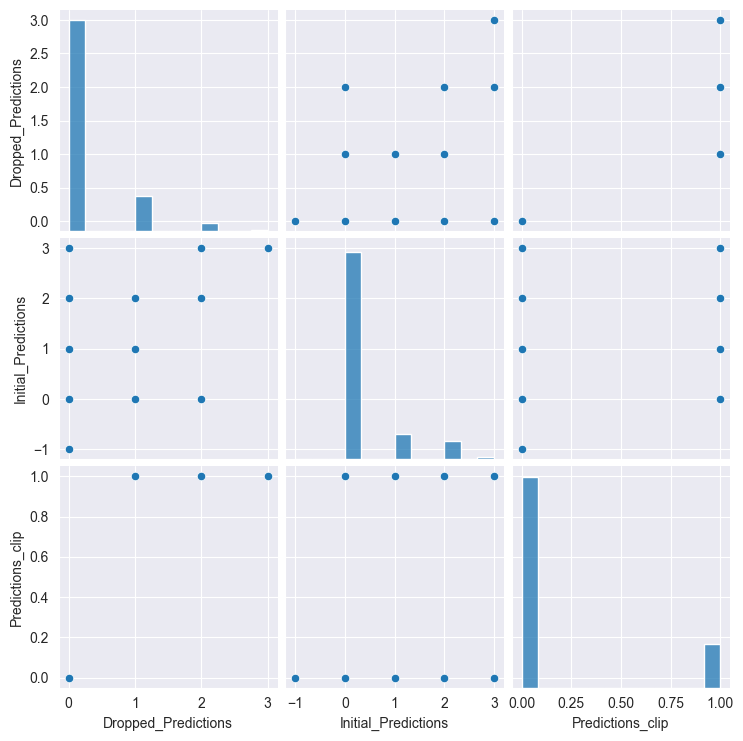

In [544]:
sb.pairplot(pred_df)
# sb.scatterplot(pred_df['Initial_Predictions'])
# sb.scatterplot(y_test)

after a couple considerations based on the prediction analysis, we finally droppped the less correlated series of the dataset and the Gradient Boosting Regressor outperformed previous results.

## df.head()

In [744]:
df2 = pd.read_csv("D:\Open Classroom\Datasets\AQI - Air Quality Index\data_date.csv")
df2.head()

,Date,Country,Status,AQI Value
0,2022-07-21,Albania,Good,14
1,2022-07-21,Algeria,Moderate,65
2,2022-07-21,Andorra,Moderate,55
3,2022-07-21,Angola,Unhealthy for Sensitive Groups,113
4,2022-07-21,Argentina,Moderate,63


In [745]:
df2.shape

(15440, 4)

In [746]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15440 entries, 0 to 15439
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       15440 non-null  object
 1   Country    15440 non-null  object
 2   Status     15440 non-null  object
 3   AQI Value  15440 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 482.6+ KB


In [747]:
df2.describe().round()

,AQI Value
count,15440.0
mean,62.0
std,49.0
min,1.0
25%,29.0
50%,52.0
75%,81.0
max,963.0


In [748]:
df2.isnull().sum()

Date         0
Country      0
Status       0
AQI Value    0
dtype: int64

In [749]:
df2['AQI Value'].mean()

61.68724093264249

Text(0, 0.5, '')

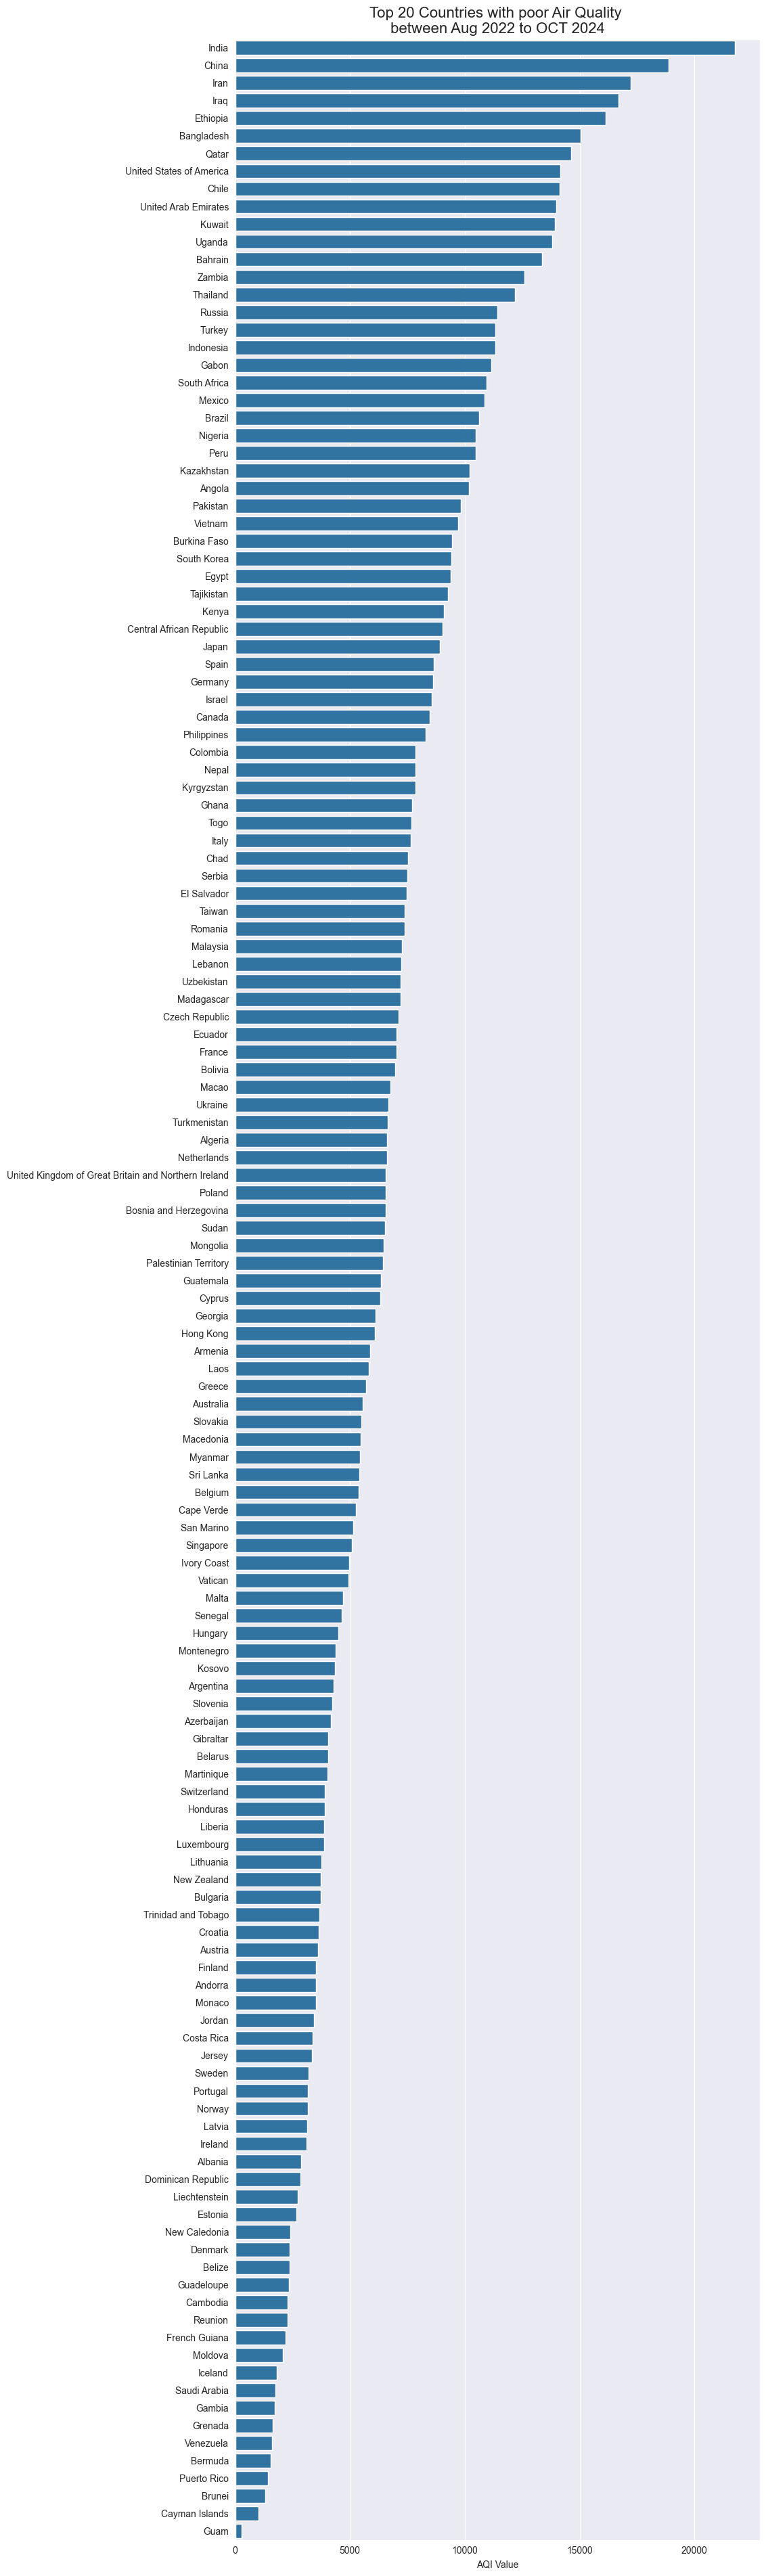

In [750]:
plt.figure(figsize=(10, 48))
country_group = df2.groupby(df2['Country'])
total_aqi_value = country_group['AQI Value'].sum().sort_values(ascending=False)
sb.barplot(y=total_aqi_value.index, x=total_aqi_value)
plt.title('Top 20 Countries with poor Air Quality \nbetween Aug 2022 to OCT 2024', fontsize=16)
plt.ylabel(None)

In [553]:
df2.head()

,Date,Country,Status,AQI Value
0,2022-07-21,Albania,Good,14
1,2022-07-21,Algeria,Moderate,65
2,2022-07-21,Andorra,Moderate,55
3,2022-07-21,Angola,Unhealthy for Sensitive Groups,113
4,2022-07-21,Argentina,Moderate,63


In [554]:
df2['Date'] = pd.to_datetime(df2['Date'])
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15440 entries, 0 to 15439
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       15440 non-null  datetime64[ns]
 1   Country    15440 non-null  object        
 2   Status     15440 non-null  object        
 3   AQI Value  15440 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 482.6+ KB


In [555]:
df2.set_index('Date', inplace=True)
df2.head()

,Country,Status,AQI Value
Date,,,
2022-07-21,Albania,Good,14
2022-07-21,Algeria,Moderate,65
2022-07-21,Andorra,Moderate,55
2022-07-21,Angola,Unhealthy for Sensitive Groups,113
2022-07-21,Argentina,Moderate,63


In [556]:
df2.index

DatetimeIndex(['2022-07-21', '2022-07-21', '2022-07-21', '2022-07-21',
               '2022-07-21', '2022-07-21', '2022-07-21', '2022-07-21',
               '2022-07-21', '2022-07-21',
               ...
               '2024-10-03', '2024-10-03', '2024-10-03', '2024-10-03',
               '2024-10-03', '2024-10-03', '2024-10-03', '2024-10-03',
               '2024-10-03', '2024-10-03'],
              dtype='datetime64[ns]', name='Date', length=15440, freq=None)

In [557]:
get_country_group = country_group.get_group('Kenya')
get_country_group.head(10)

,Country,Status,AQI Value
Date,,,
2022-07-21,Kenya,Good,40
2022-07-21,Kenya,Good,42
2022-07-22,Kenya,Moderate,54
2022-07-22,Kenya,Moderate,65
2022-07-22,Kenya,Good,34
2022-07-23,Kenya,Moderate,84
2022-07-23,Kenya,Unhealthy,185
2022-07-24,Kenya,Good,38
2022-07-25,Kenya,Good,49


<Axes: title={'center': 'Air Quality in Kenya from Aug 2022 to Oct 2024'}, xlabel='AQI Value', ylabel='Date'>

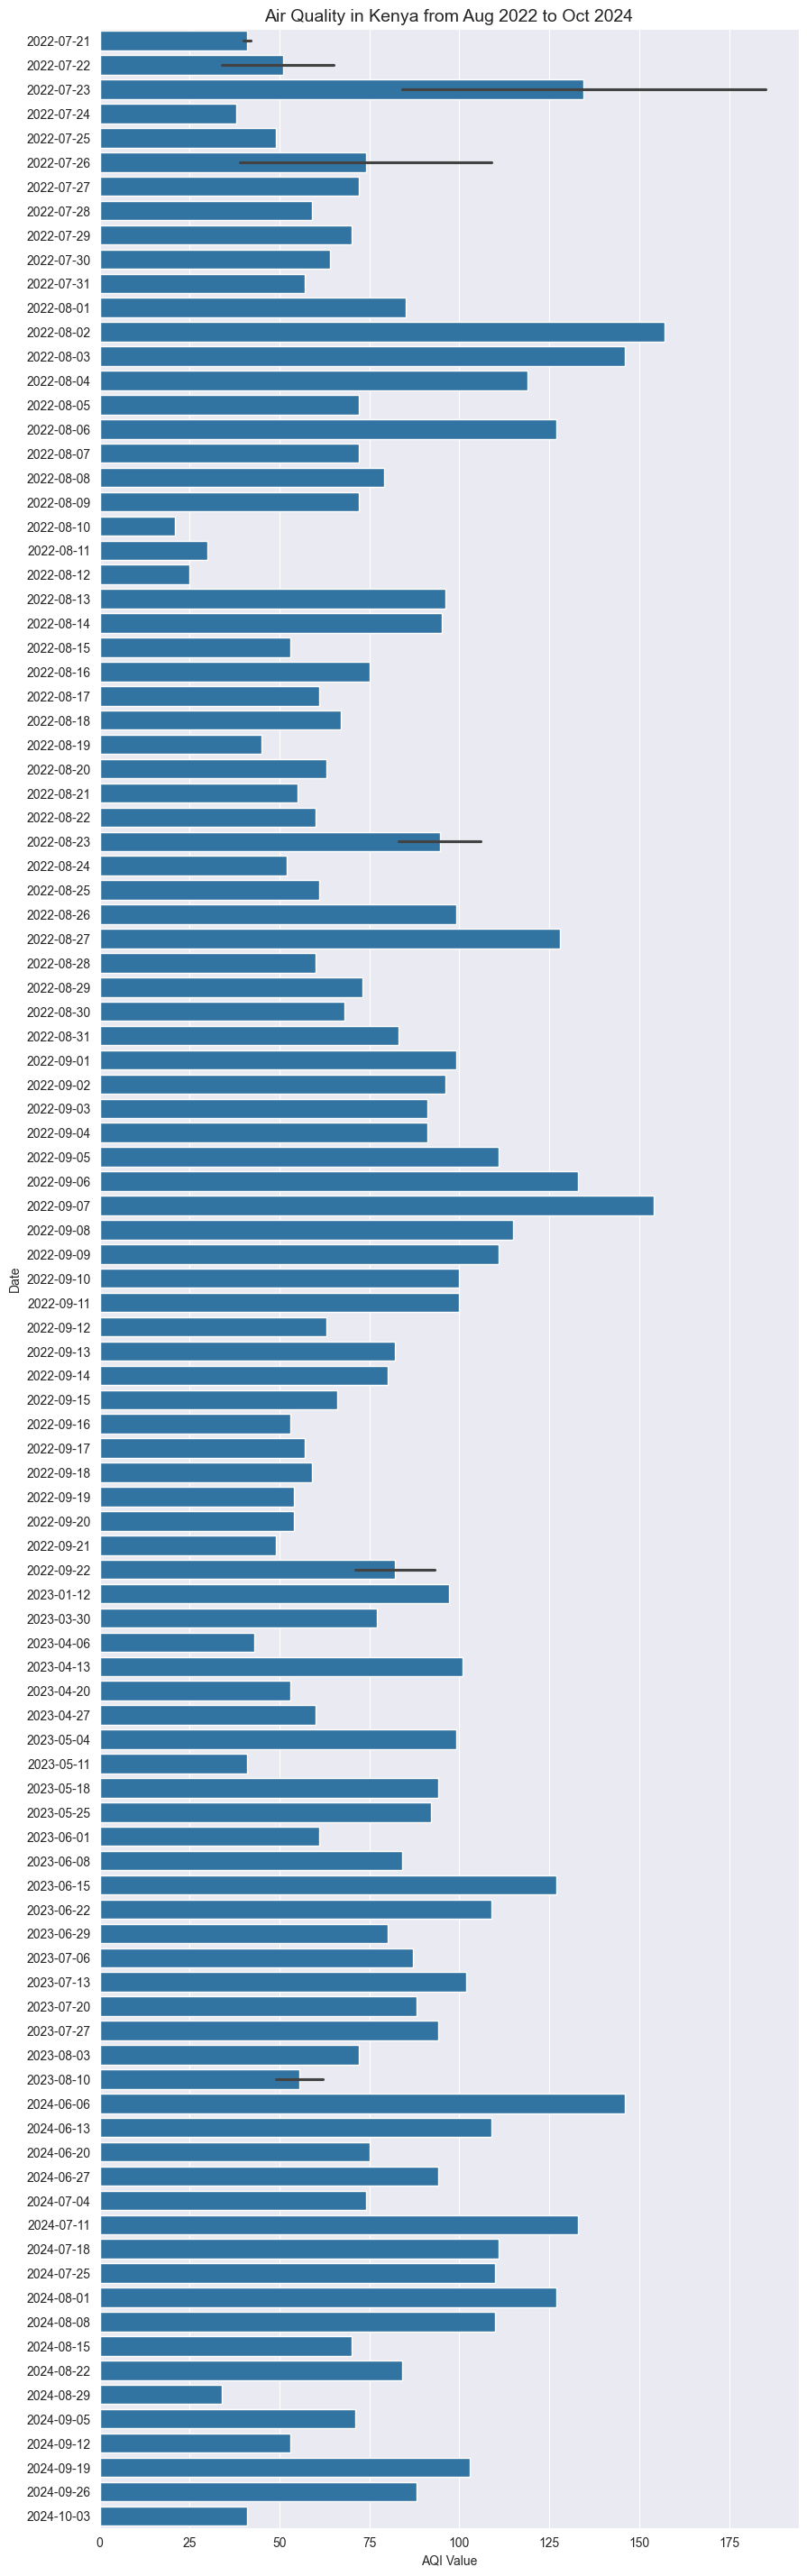

In [558]:
plt.figure(figsize=(10, 36))
plt.title('Air Quality in Kenya from Aug 2022 to Oct 2024', fontsize=14)
sb.barplot(y=get_country_group.index, x=get_country_group['AQI Value'])

<Axes: title={'center': 'Yearly Projection of Air Quality in Kenya \nFrom 2022 - 2024'}, xlabel='Date'>

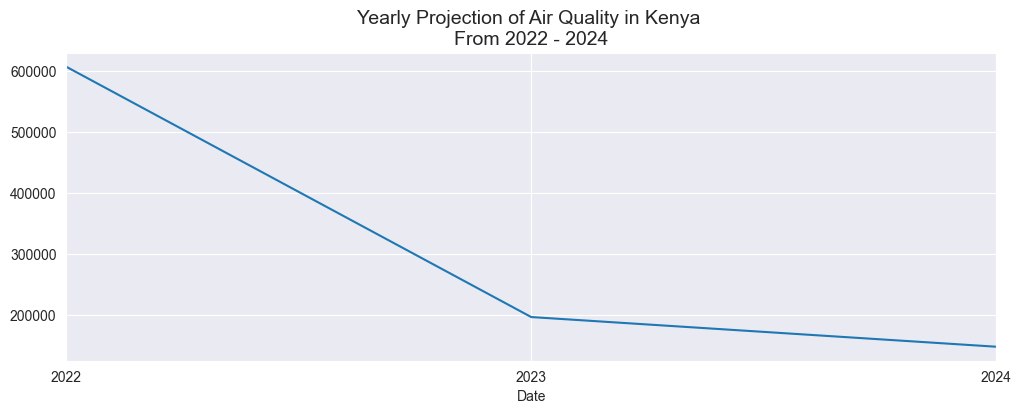

In [559]:
plt.figure(figsize=(12, 4))
plt.title('Yearly Projection of Air Quality in Kenya \nFrom 2022 - 2024', fontsize=14)
df2['AQI Value'].resample('y').sum().plot()

<Axes: title={'center': 'Monthly Projection of Air Quality in Kenya \nFrom Aug 2022 - Oct 2024'}, xlabel='Date'>

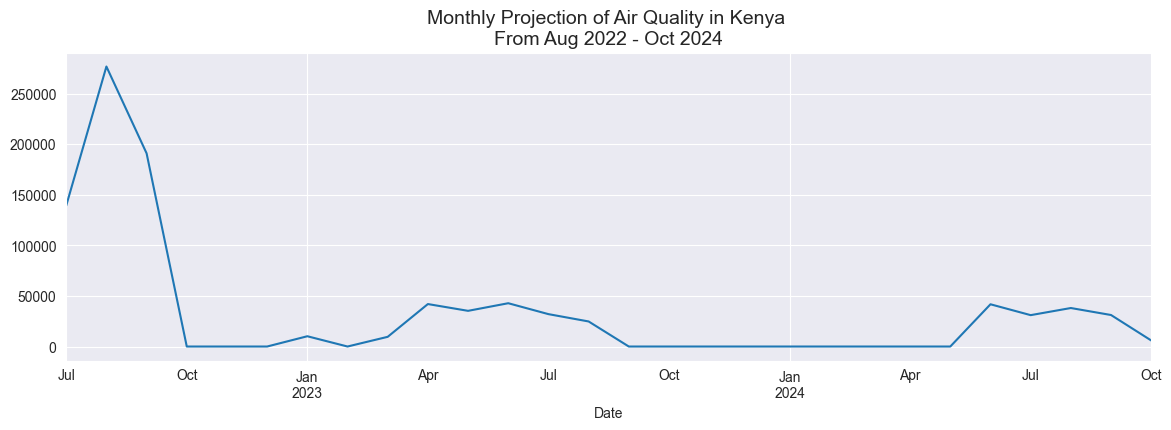

In [560]:
plt.figure(figsize=(14, 4))
plt.title('Monthly Projection of Air Quality in Kenya \nFrom Aug 2022 - Oct 2024', fontsize=14)
df2['AQI Value'].resample('m').sum().plot()

<Axes: title={'center': 'Weekly Projection of Air Quality in Kenya \nFrom Aug 2022 - Oct 2024'}, xlabel='Date'>

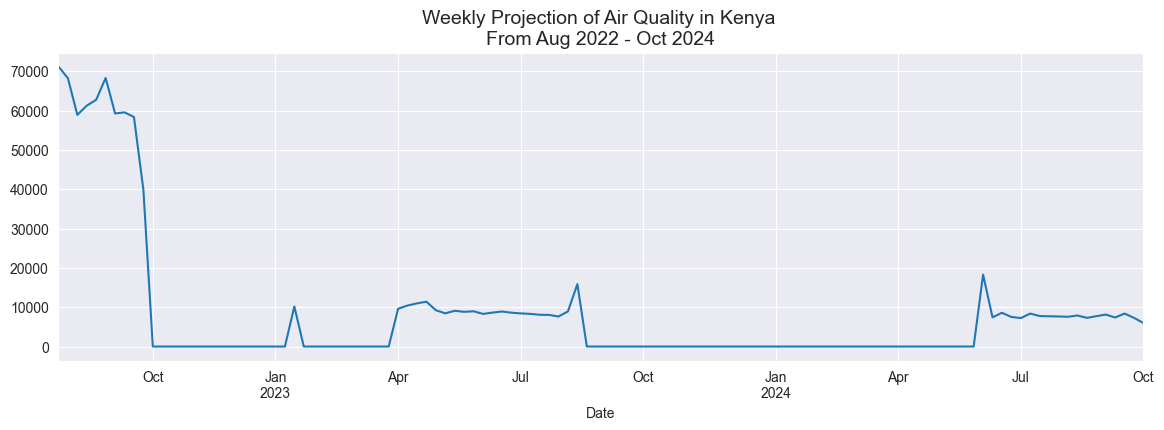

In [561]:
plt.figure(figsize=(14, 4))
plt.title('Weekly Projection of Air Quality in Kenya \nFrom Aug 2022 - Oct 2024', fontsize=14)
df2['AQI Value'].resample('w').sum().plot()

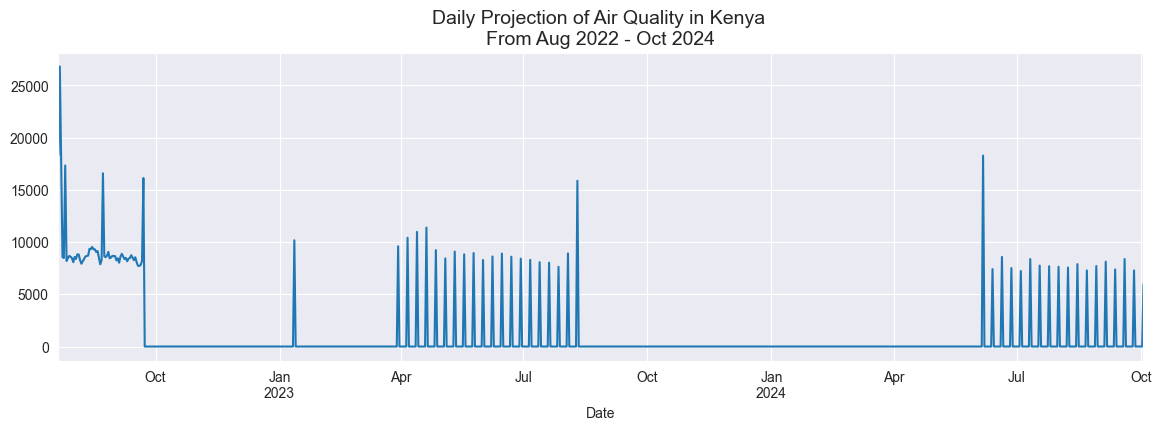

In [569]:
plt.figure(figsize=(14, 4))
plt.title('Daily Projection of Air Quality in Kenya \nFrom Aug 2022 - Oct 2024', fontsize=14)
df2['AQI Value'].resample('d').sum().plot()
daily_resample = df2['AQI Value'].resample('d').sum()

<Axes: title={'center': 'Hourly Projection of Air Quality in Kenya \nFrom Aug 2022 - Oct 2024'}, xlabel='Date'>

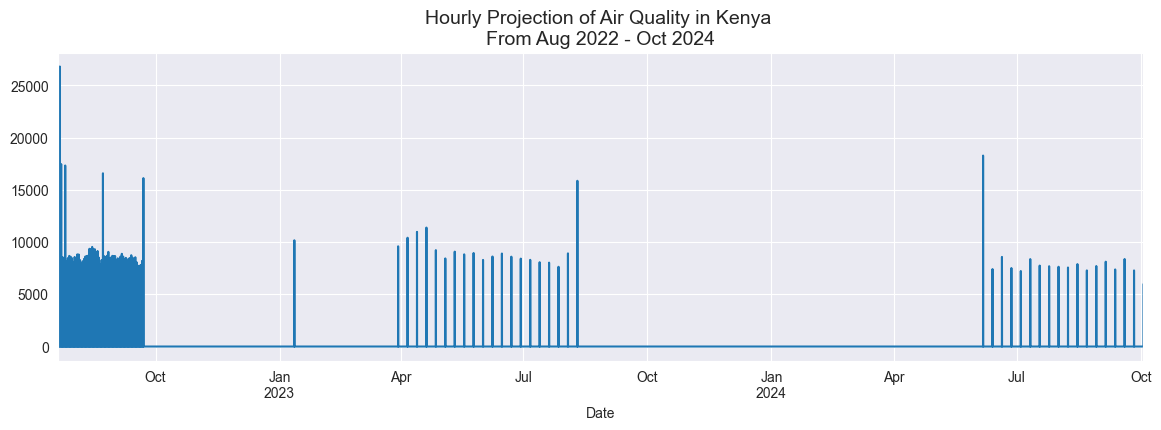

In [570]:
plt.figure(figsize=(14, 4))
plt.title('Hourly Projection of Air Quality in Kenya \nFrom Aug 2022 - Oct 2024', fontsize=14)
df2['AQI Value'].resample('h').sum().plot()

In [751]:
df2.reset_index(inplace=True)
df2.rename(columns=
           {
        'Date':'ds', 'AQI Value':'y'
            }, 
           inplace=True)

df2.head()

,index,ds,Country,Status,y
0,0,2022-07-21,Albania,Good,14
1,1,2022-07-21,Algeria,Moderate,65
2,2,2022-07-21,Andorra,Moderate,55
3,3,2022-07-21,Angola,Unhealthy for Sensitive Groups,113
4,4,2022-07-21,Argentina,Moderate,63


<Axes: xlabel='Status'>

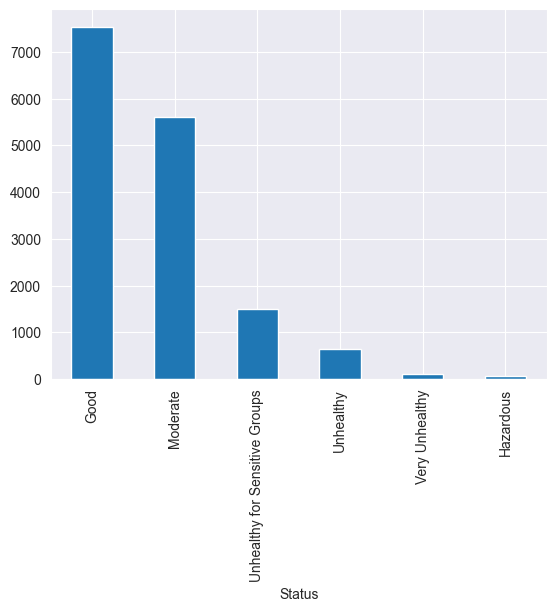

In [756]:
df2['Status'].value_counts().plot(kind='bar')

In [572]:
forecast_model = prophet.Prophet()
forecast_model.fit(df2)

15:41:08 - cmdstanpy - INFO - Chain [1] start processing
15:41:11 - cmdstanpy - INFO - Chain [1] done processing


In [573]:
future = forecast_model.make_future_dataframe(periods=730, freq='D', include_history=True)
forecast = forecast_model.predict(future)

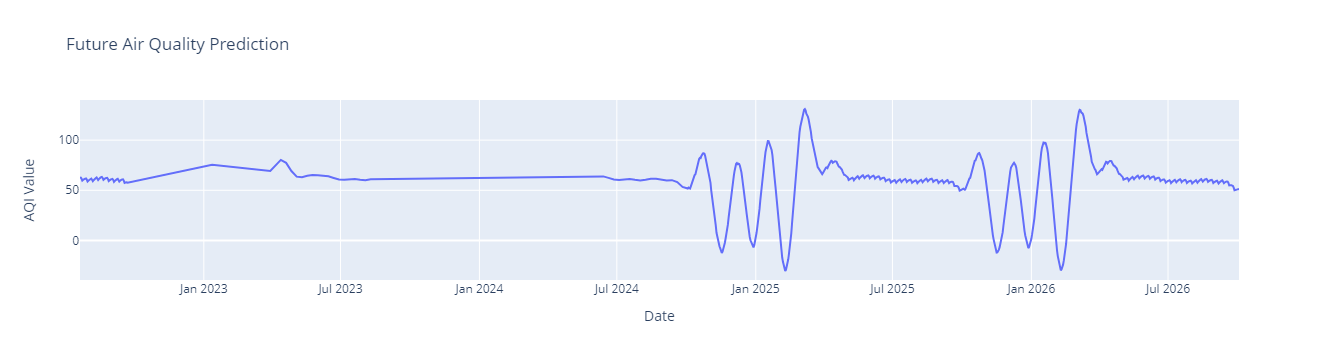

In [574]:
fig = go.Figure()

# Add historical data
# fig.add_trace(go.Scatter(x=data['ds'], y=data['y'], mode='lines', name='Actual', fill='red'))

# Add forecasted data
fig.add_trace(go.Scatter(x=forecast['ds'], y=forecast['yhat'], mode='lines', name='Predicted'))

# Add prediction intervals
# fig.add_trace(go.Scatter(x=forecast['ds'], y=forecast['yhat_lower'], fill=None, mode='lines', line_color='lightgrey', name='Lower Confidence Interval'))
# fig.add_trace(go.Scatter(x=forecast['ds'], y=forecast['yhat_upper'], fill='tonexty', mode='lines', line_color='lightgrey', name='Upper Confidence Interval'))

# Update layout
fig.update_layout(
    title=f'Future Air Quality Prediction',
    xaxis_title='Date',
    yaxis_title='AQI Value',
    legend_title='Legend'
)

fig.show()


In [575]:
# get_country_group_copy = get_country_group.copy()

get_country_group.reset_index(inplace=True)
get_country_group.rename(columns={
    'Date':'ds',
    'AQI Value':'y',
}, inplace=True)

get_country_group.head()

C:\Users\antonie\AppData\Local\Temp\ipykernel_11180\3108850083.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,ds,Country,Status,y
0,2022-07-21,Kenya,Good,40
1,2022-07-21,Kenya,Good,42
2,2022-07-22,Kenya,Moderate,54
3,2022-07-22,Kenya,Moderate,65
4,2022-07-22,Kenya,Good,34


In [576]:
kenya_forecast_model = prophet.Prophet()
kenya_forecast_model.fit(get_country_group)

15:41:12 - cmdstanpy - INFO - Chain [1] start processing
15:41:12 - cmdstanpy - INFO - Chain [1] done processing


In [577]:
future_kenya = kenya_forecast_model.make_future_dataframe(periods=730, freq='D', include_history=True)
kenyan_predictions = kenya_forecast_model.predict(future_kenya)

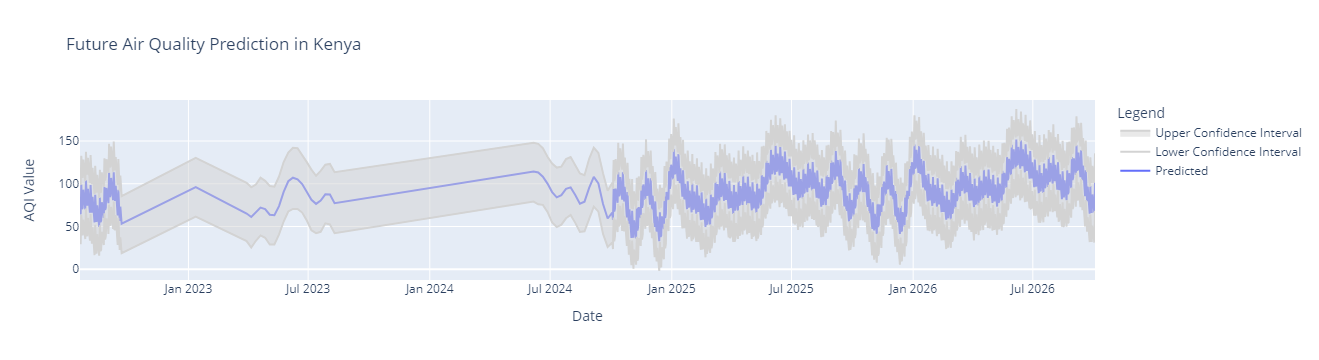

In [578]:
fig = go.Figure()

# Add historical data
# fig.add_trace(go.Scatter(x=data['ds'], y=data['y'], mode='lines', name='Actual', fill='red'))

# Add forecasted data
fig.add_trace(go.Scatter(x=kenyan_predictions['ds'], y=kenyan_predictions['yhat'], mode='lines', name='Predicted'))

# Add prediction intervals
fig.add_trace(go.Scatter(x=kenyan_predictions['ds'], y=kenyan_predictions['yhat_lower'], fill=None, mode='lines', line_color='lightgrey', name='Lower Confidence Interval'))
fig.add_trace(go.Scatter(x=kenyan_predictions['ds'], y=kenyan_predictions['yhat_upper'], fill='tonexty', mode='lines', line_color='lightgrey', name='Upper Confidence Interval'))

# Update layout
fig.update_layout(
    title=f'Future Air Quality Prediction in Kenya',
    xaxis_title='Date',
    yaxis_title='AQI Value',
    legend_title='Legend'
)

fig.show()


In [763]:
df3 = pd.read_csv("D:\Open Classroom\Datasets\World Air Quality Index by City and Coordinates\AQI and Lat Long of Countries.csv")
df3.head()

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category,lat,lng
0,Russian Federation,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate,44.7444,44.2031
1,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good,-5.2900,-44.4900
2,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good,-11.2958,-41.9869
3,Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate,37.1667,15.1833
4,Poland,Przasnysz,34,Good,1,Good,34,Good,0,Good,20,Good,53.0167,20.8833


In [764]:
df3.shape

(16695, 14)

In [765]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16695 entries, 0 to 16694
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             16393 non-null  object 
 1   City                16695 non-null  object 
 2   AQI Value           16695 non-null  int64  
 3   AQI Category        16695 non-null  object 
 4   CO AQI Value        16695 non-null  int64  
 5   CO AQI Category     16695 non-null  object 
 6   Ozone AQI Value     16695 non-null  int64  
 7   Ozone AQI Category  16695 non-null  object 
 8   NO2 AQI Value       16695 non-null  int64  
 9   NO2 AQI Category    16695 non-null  object 
 10  PM2.5 AQI Value     16695 non-null  int64  
 11  PM2.5 AQI Category  16695 non-null  object 
 12  lat                 16695 non-null  float64
 13  lng                 16695 non-null  float64
dtypes: float64(2), int64(5), object(7)
memory usage: 1.8+ MB


In [766]:
df3.describe().round()

,AQI Value,CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value,lat,lng
count,16695.0,16695.0,16695.0,16695.0,16695.0,16695.0,16695.0
mean,63.0,1.0,32.0,4.0,60.0,30.0,-4.0
std,43.0,2.0,23.0,6.0,43.0,23.0,73.0
min,7.0,0.0,0.0,0.0,0.0,-55.0,-172.0
25%,38.0,1.0,20.0,0.0,34.0,17.0,-75.0
50%,52.0,1.0,29.0,2.0,52.0,39.0,6.0
75%,69.0,1.0,38.0,5.0,69.0,47.0,36.0
max,500.0,133.0,222.0,91.0,500.0,71.0,178.0


In [767]:
df3.isnull().sum()

Country               302
City                    0
AQI Value               0
AQI Category            0
CO AQI Value            0
CO AQI Category         0
Ozone AQI Value         0
Ozone AQI Category      0
NO2 AQI Value           0
NO2 AQI Category        0
PM2.5 AQI Value         0
PM2.5 AQI Category      0
lat                     0
lng                     0
dtype: int64

In [768]:
df3[pd.isna(df3['Country'])].head(20)

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category,lat,lng
385,NaN,Granville,30,Good,1,Good,30,Good,3,Good,25,Good,48.8381,-1.5869
560,NaN,Kingstown,163,Unhealthy,0,Good,25,Good,0,Good,163,Unhealthy,13.1578,-61.2250
623,NaN,Nanakuli,30,Good,0,Good,27,Good,0,Good,30,Good,21.3892,-158.1445
629,NaN,Lavagna,55,Moderate,1,Good,38,Good,2,Good,55,Moderate,44.3167,9.3333
664,NaN,Ladispoli,48,Good,1,Good,48,Good,2,Good,34,Good,41.9544,12.0742
781,NaN,Nettuno,53,Moderate,1,Good,53,Moderate,1,Good,23,Good,41.4667,12.6667
811,NaN,Puebloviejo,71,Moderate,1,Good,16,Good,0,Good,71,Moderate,10.9972,-74.2875
864,NaN,Fiumicino,51,Moderate,2,Good,39,Good,7,Good,51,Moderate,41.7667,12.2333
1086,NaN,Carteret,56,Moderate,1,Good,29,Good,9,Good,56,Moderate,40.5849,-74.2284
1127,NaN,Ercolano,48,Good,1,Good,48,Good,1,Good,30,Good,40.8000,14.3500


In [769]:
import pycountry as pc

In [770]:
pc.countries.get(alpha_2='ke')

Country(alpha_2='KE', alpha_3='KEN', flag='🇰🇪', name='Kenya', numeric='404', official_name='Republic of Kenya')

In [772]:
get_country_name = pc.countries.search_fuzzy('maputo')
get_country_name[0].name

'Mozambique'

In [774]:
na_countries = df3[pd.isna(df3['Country'])]
for i in na_countries['City']:
    count = 0
    try:
        pc.countries.search_fuzzy(df3[i])
        print('done')
    except Exception as e:
        print('unsuccessful')
    break
    
    # if get_country_name == True:
    #     df3[df3.fillna(df3['Country'].iloc[get_country_name])]

unsuccessful


In [647]:
df3.dropna(axis=0, inplace=True)

In [648]:
df3.isnull().sum()

Country               0
City                  0
AQI Value             0
AQI Category          0
CO AQI Value          0
CO AQI Category       0
Ozone AQI Value       0
Ozone AQI Category    0
NO2 AQI Value         0
NO2 AQI Category      0
PM2.5 AQI Value       0
PM2.5 AQI Category    0
lat                   0
lng                   0
dtype: int64

In [649]:
df3.shape

(16393, 14)

In [776]:
df3.head()

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category,lat,lng
0,Russian Federation,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate,44.7444,44.2031
1,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good,-5.2900,-44.4900
2,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good,-11.2958,-41.9869
3,Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate,37.1667,15.1833
4,Poland,Przasnysz,34,Good,1,Good,34,Good,0,Good,20,Good,53.0167,20.8833


In [777]:
df3.columns.unique()

Index(['Country', 'City', 'AQI Value', 'AQI Category', 'CO AQI Value',
       'CO AQI Category', 'Ozone AQI Value', 'Ozone AQI Category',
       'NO2 AQI Value', 'NO2 AQI Category', 'PM2.5 AQI Value',
       'PM2.5 AQI Category', 'lat', 'lng'],
      dtype='object')

Text(0.5, 1.0, 'Persons Correlation of columns')

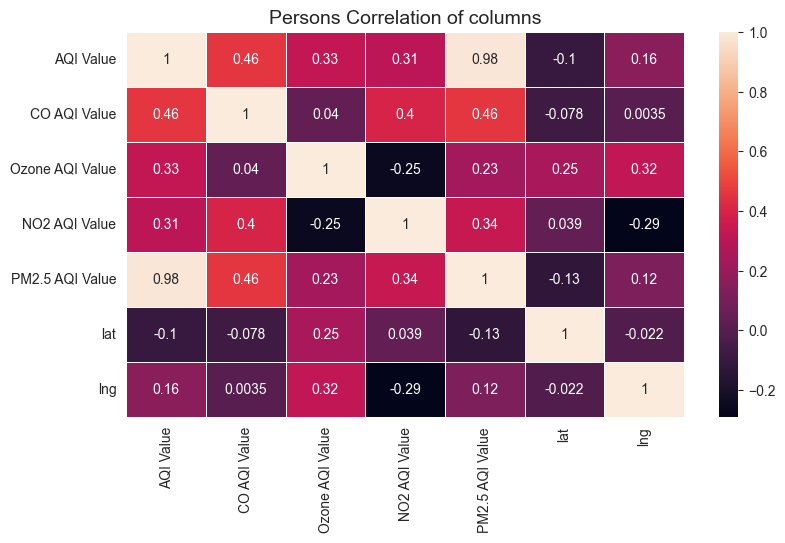

In [665]:
plt.figure(figsize=(9, 5))
sb.heatmap(df3.select_dtypes(include='number').corr(), annot=True, linewidths=0.6)
plt.title('Persons Correlation of columns', fontsize=14)

<Axes: >

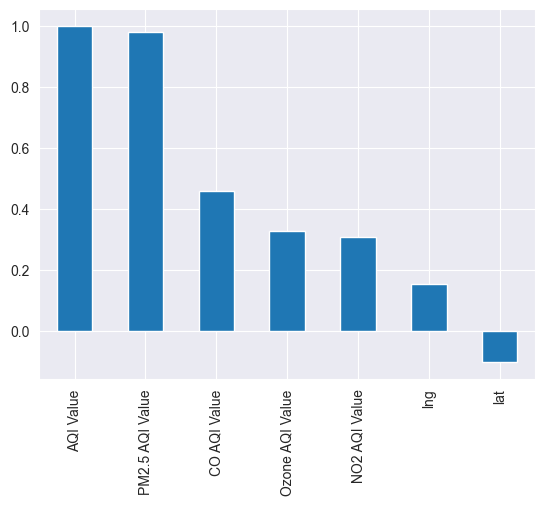

In [670]:
df3.select_dtypes(include=['float64', 'int64']).corr()['AQI Value'].sort_values(ascending=False).plot(kind='bar')

Text(0, 0.5, '')

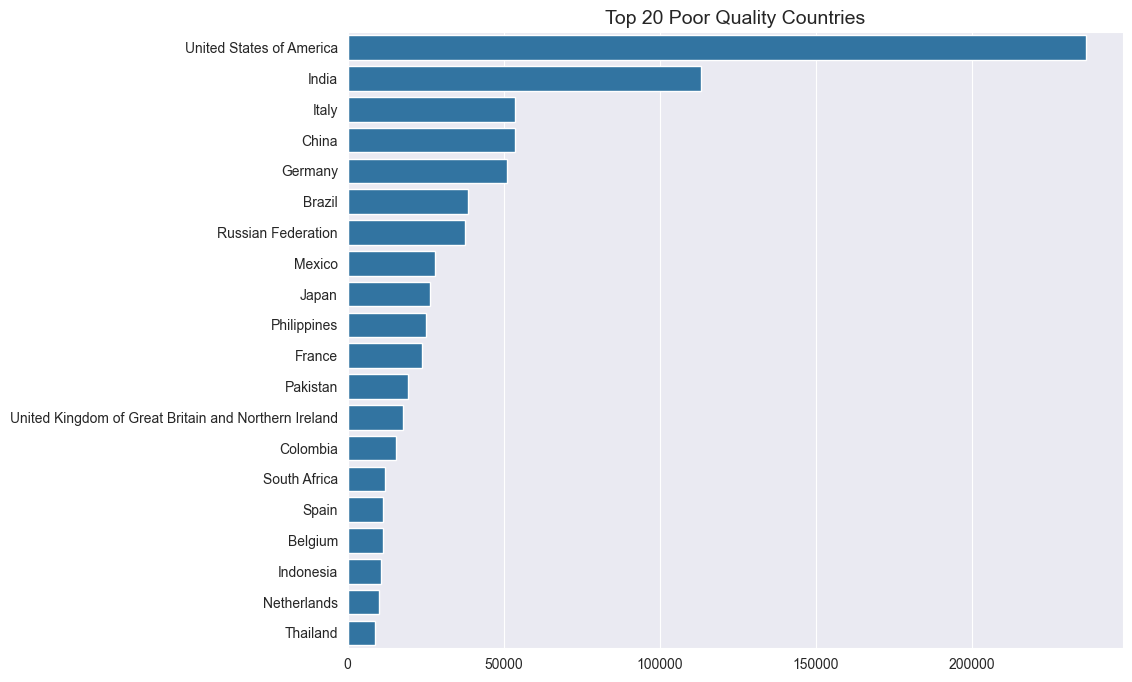

In [720]:
plt.figure(figsize=(10, 8))
plt.title('Top 20 Poor Quality Countries', fontsize=14)
country_grp = df3.groupby('Country')
get_countries = country_grp['AQI Value'].sum().sort_values(ascending=False).head(20)
sb.barplot(y=get_countries.index, x=get_countries.values)
plt.ylabel(None)

In [721]:
df3.head()

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category,lat,lng
0,Russian Federation,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate,44.7444,44.2031
1,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good,-5.2900,-44.4900
2,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good,-11.2958,-41.9869
3,Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate,37.1667,15.1833
4,Poland,Przasnysz,34,Good,1,Good,34,Good,0,Good,20,Good,53.0167,20.8833


In [724]:
df3.columns.unique

<bound method Index.unique of Index(['Country', 'City', 'AQI Value', 'AQI Category', 'CO AQI Value',
       'CO AQI Category', 'Ozone AQI Value', 'Ozone AQI Category',
       'NO2 AQI Value', 'NO2 AQI Category', 'PM2.5 AQI Value',
       'PM2.5 AQI Category', 'lat', 'lng'],
      dtype='object')>